In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model
from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.005345
O erro quadrático total foi: 2.602278
O maior erro por previsão foi: 0.589093
O erro relativo foi: 14.624473%
O número de verdadeiros negativos foi: 1021
O número de verdadeiros positivos foi: 90
O número de falsos negativos foi: 63
O número de falsos positivos foi: 93
O POD foi: 0.588235
O FAR foi: 0.508197
A ACC foi: 0.876875
O kappa foi: 0.045283
precission: 0.491803
recal: 0.588235
f1: 0.535714


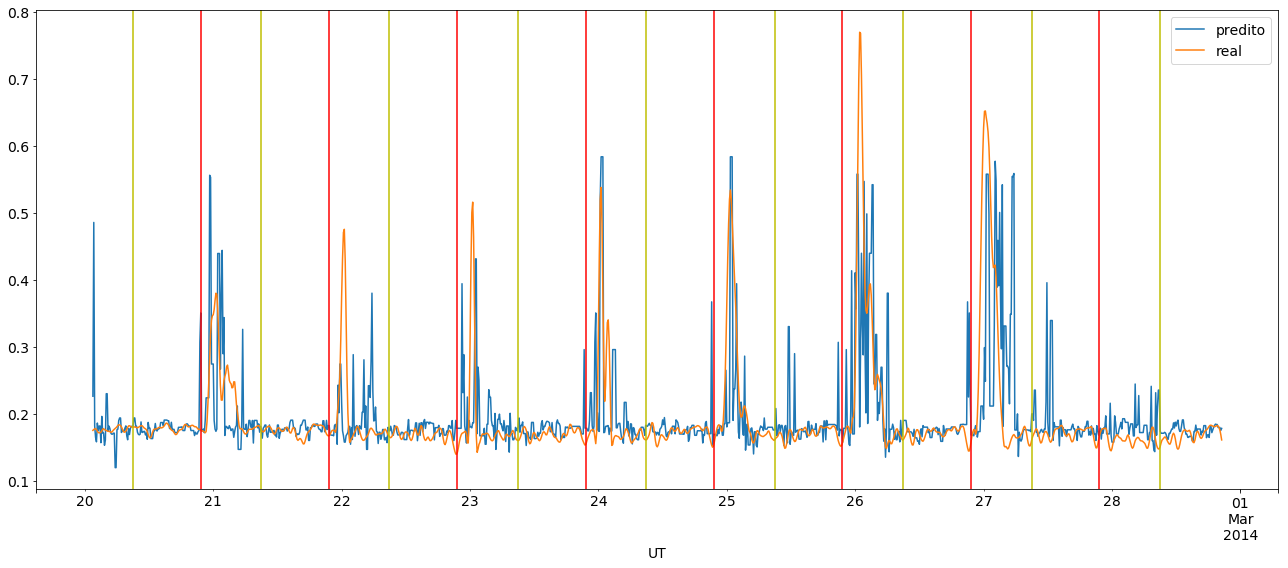

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4',
                                         file_to_save_model='./images/regression_cart.eps')

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.006871
O erro quadrático total foi: 2.950490
O maior erro por previsão foi: 0.595333
O erro relativo foi: 20.169722%
O número de verdadeiros negativos foi: 942
O número de verdadeiros positivos foi: 91
O número de falsos negativos foi: 62
O número de falsos positivos foi: 172
O POD foi: 0.594771
O FAR foi: 0.653992
A ACC foi: 0.815312
O kappa foi: 0.046133
precission: 0.346008
recal: 0.594771
f1: 0.437500


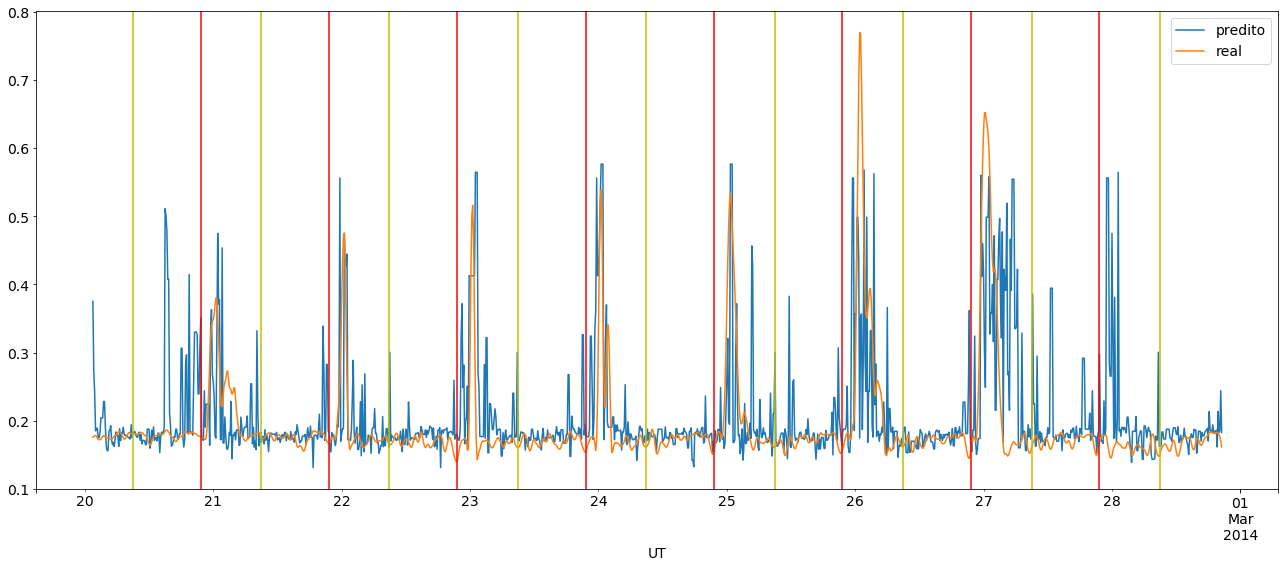

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.005755
O erro quadrático total foi: 2.700322
O maior erro por previsão foi: 0.588201
O erro relativo foi: 15.615501%
O número de verdadeiros negativos foi: 1012
O número de verdadeiros positivos foi: 83
O número de falsos negativos foi: 70
O número de falsos positivos foi: 102
O POD foi: 0.542484
O FAR foi: 0.551351
A ACC foi: 0.864246
O kappa foi: 0.049403
precission: 0.448649
recal: 0.542484
f1: 0.491124


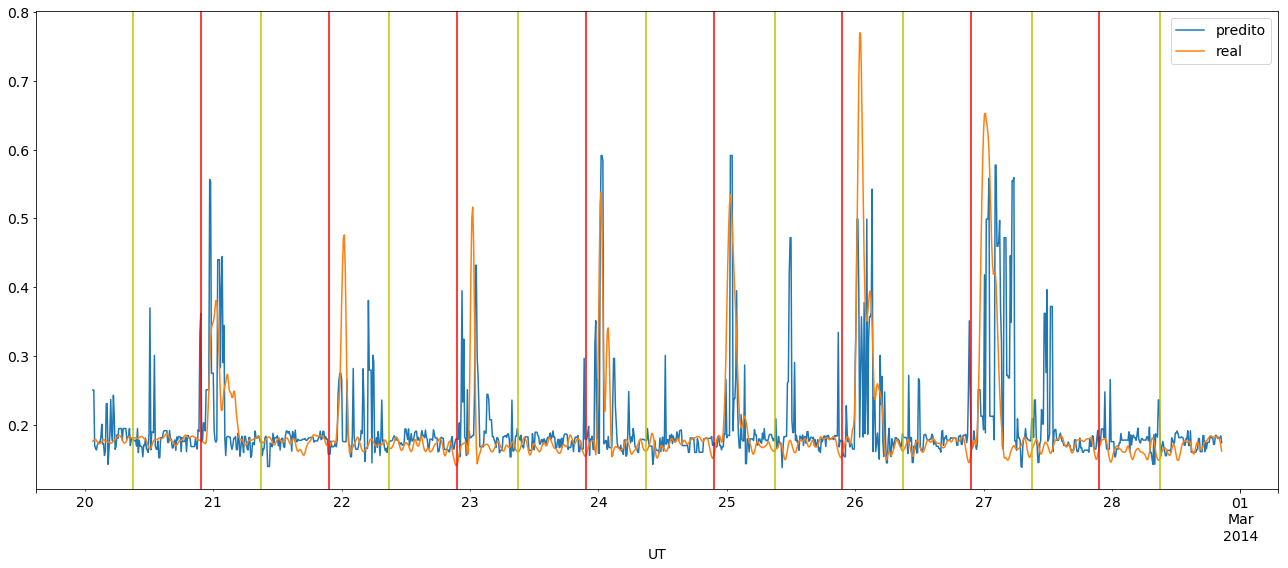

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.005420
O erro quadrático total foi: 2.620561
O maior erro por previsão foi: 0.546540
O erro relativo foi: 14.724001%
O número de verdadeiros negativos foi: 1011
O número de verdadeiros positivos foi: 86
O número de falsos negativos foi: 67
O número de falsos positivos foi: 103
O POD foi: 0.562092
O FAR foi: 0.544974
A ACC foi: 0.865825
O kappa foi: 0.047714
precission: 0.455026
recal: 0.562092
f1: 0.502924


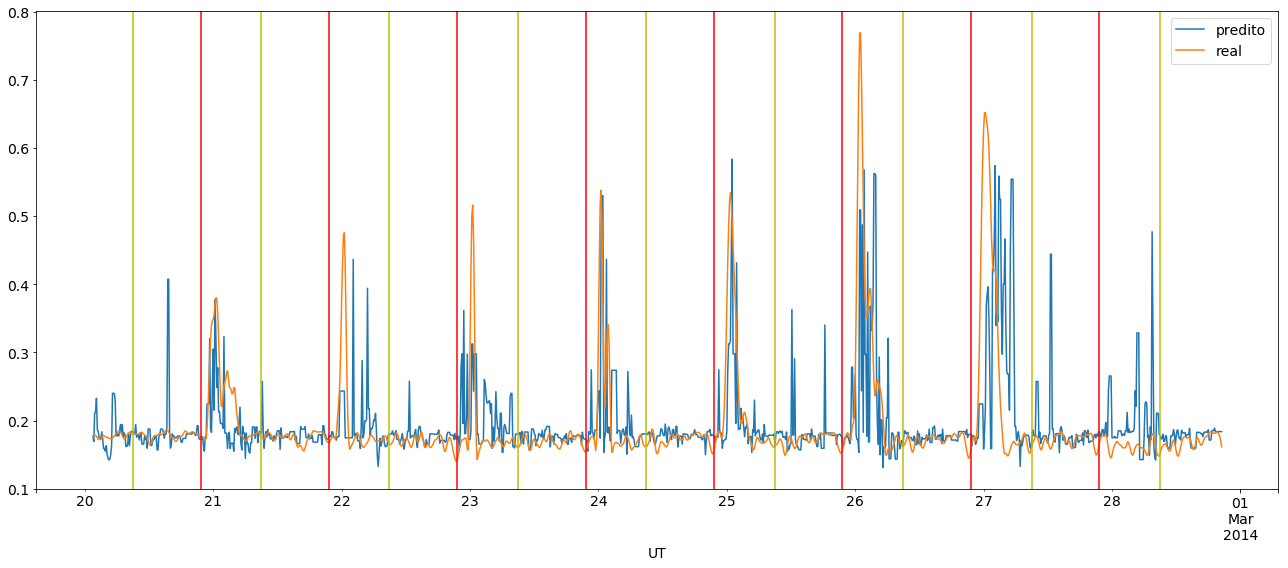

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.006802
O erro quadrático total foi: 2.935637
O maior erro por previsão foi: 0.588201
O erro relativo foi: 15.859686%
O número de verdadeiros negativos foi: 1010
O número de verdadeiros positivos foi: 72
O número de falsos negativos foi: 81
O número de falsos positivos foi: 104
O POD foi: 0.470588
O FAR foi: 0.590909
A ACC foi: 0.853986
O kappa foi: 0.055627
precission: 0.409091
recal: 0.470588
f1: 0.437690


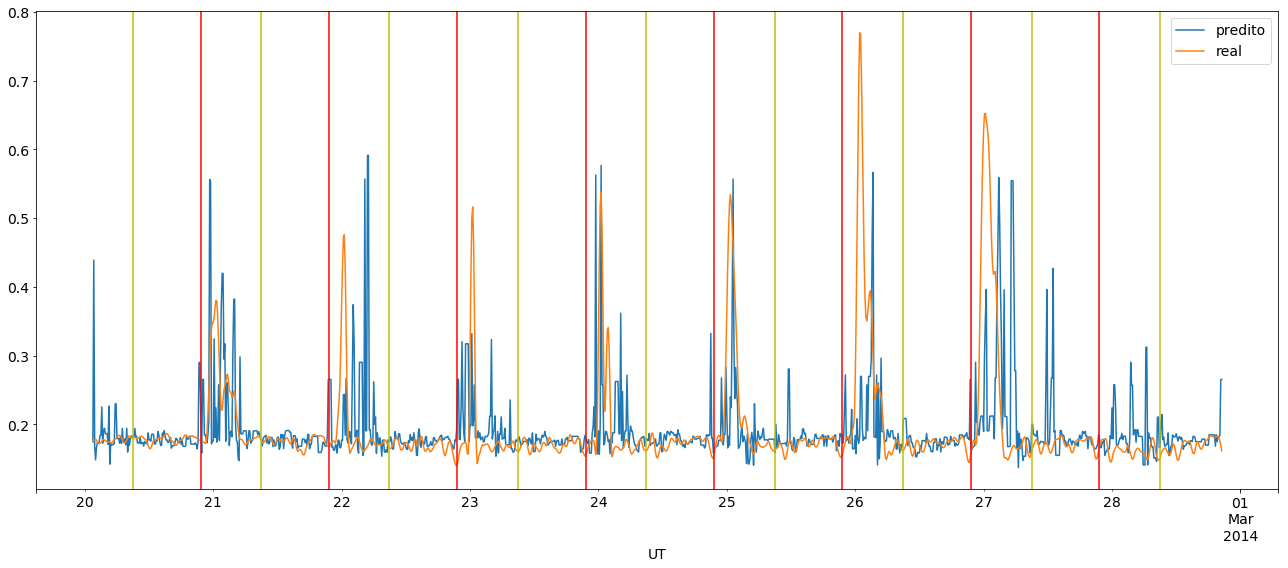

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.005988
O erro quadrático total foi: 2.754414
O maior erro por previsão foi: 0.603787
O erro relativo foi: 14.801776%
O número de verdadeiros negativos foi: 1023
O número de verdadeiros positivos foi: 80
O número de falsos negativos foi: 73
O número de falsos positivos foi: 91
O POD foi: 0.522876
O FAR foi: 0.532164
A ACC foi: 0.870560
O kappa foi: 0.051056
precission: 0.467836
recal: 0.522876
f1: 0.493827


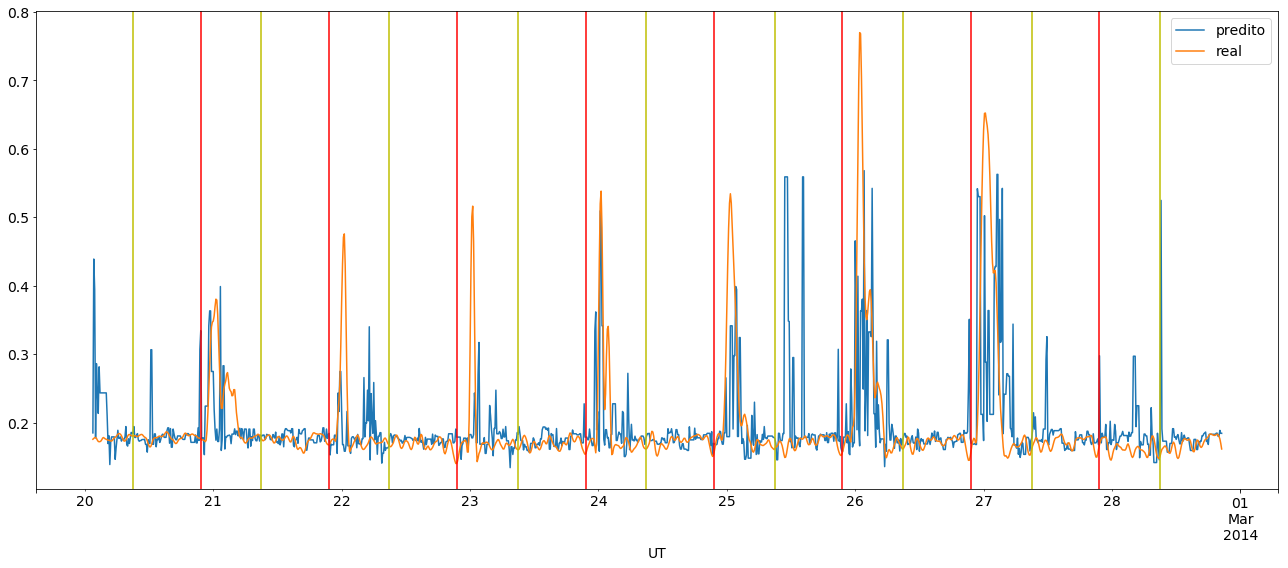

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']

Error for the time series sample:
O erro quadrático médio foi: 0.006503
O erro quadrático total foi: 2.870345
O maior erro por previsão foi: 0.594918
O erro relativo foi: 16.706594%
O número de verdadeiros negativos foi: 990
O número de verdadeiros positivos foi: 91
O número de falsos negativos foi: 62
O número de falsos positivos foi: 124
O POD foi: 0.594771
O FAR foi: 0.576744
A ACC foi: 0.853197
O kappa foi: 0.045265
precission: 0.423256
recal: 0.594771
f1: 0.494565


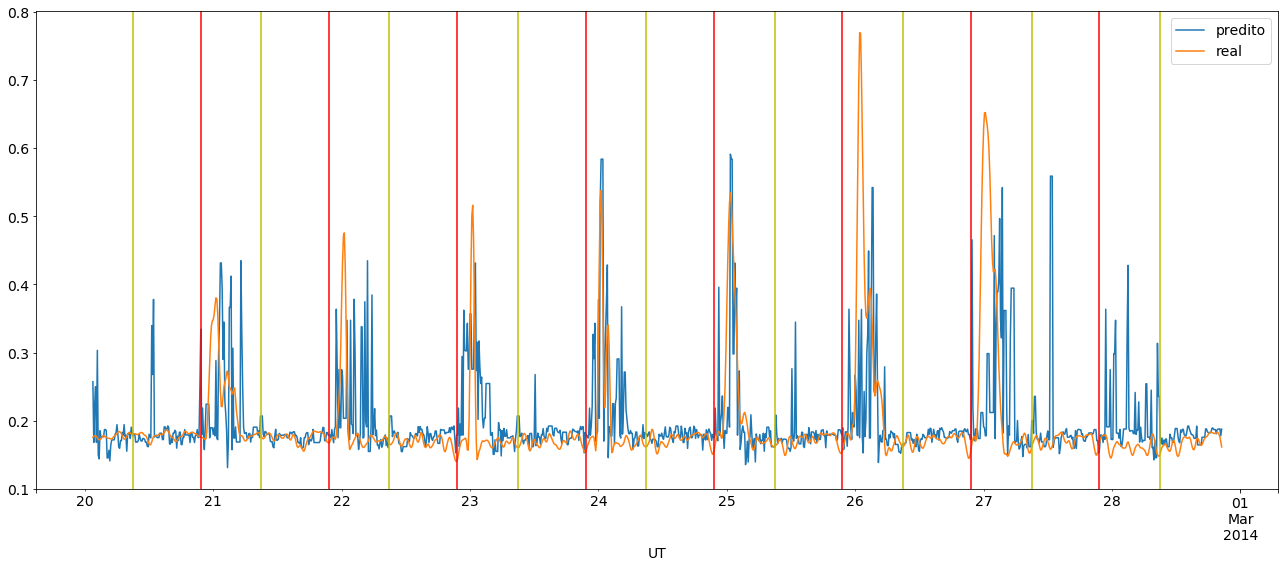

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']

Error for the time series sample:
O erro quadrático médio foi: 0.005669
O erro quadrático total foi: 2.680021
O maior erro por previsão foi: 0.587316
O erro relativo foi: 15.285401%
O número de verdadeiros negativos foi: 1007
O número de verdadeiros positivos foi: 88
O número de falsos negativos foi: 65
O número de falsos positivos foi: 107
O POD foi: 0.575163
O FAR foi: 0.548718
A ACC foi: 0.864246
O kappa foi: 0.046640
precission: 0.451282
recal: 0.575163
f1: 0.505747


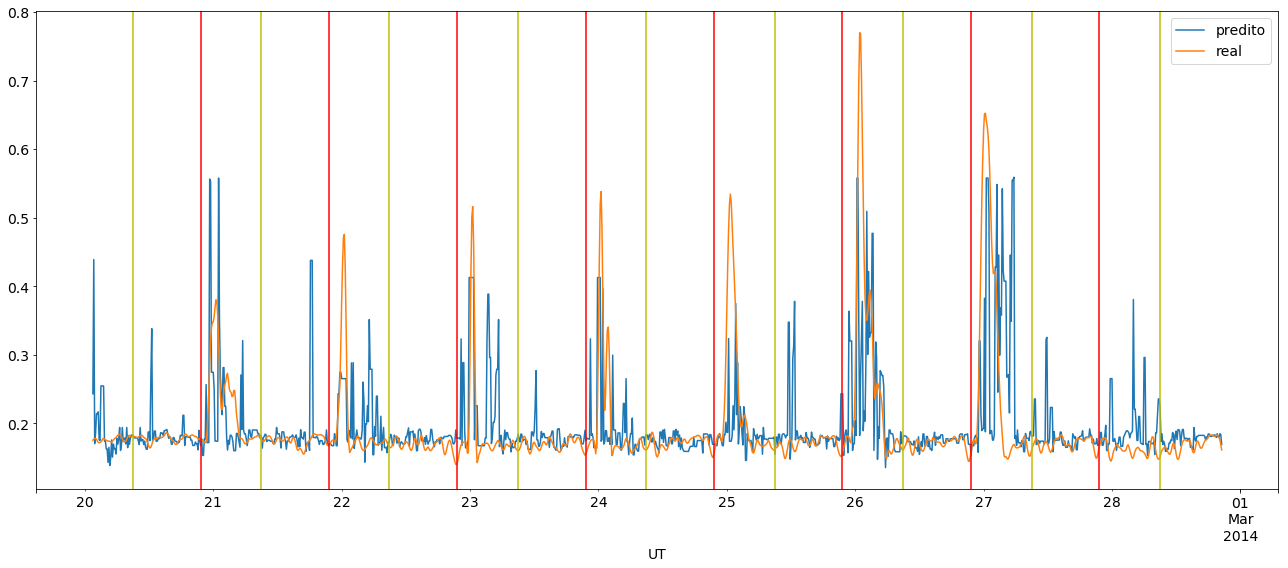

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')